HW3_d_iv

A few Assumptions :

In the previous portion, we've already select the best time series split and obtained via recursive feature elimination the best set of features corresponding to the split (see the various attached files)

For the subsequent portions we'll do the following : 

We'll use the original dataset without splitting it. And we'll keep all of the features for each time series (the three that we've worked with)

NOTE : The best split and the corresponding best features and the corresponding CV test error estimated have already been obtained in the previous portions, in detail, in the various .csv extracted and the Read Me files that explain what the .csv mean. We've, via RFE obtained all the relevant features for all splits along with their p-values, for all 20 splits.

RFE used was thus : Check if all p-values are under 0.05. If they aren't then remove the feature with the largest p-value. Continue till all p-values under 0.05. Again this could be done so easily as this is a binary logistic regression problem, for multi-class problem we'd have a beta matrix. Here we've also checked for p-values of the constant term that appears.


Thus, in conclusion :

We'll use the original dataset, without any splits, taking all the features into consideration. We could, actually, remove all those features that are obtained to be redundant, as obtained in the .csv file, however we won't do that here for simplicity.

So we'll work with the whole, unsplitted dataset. Refer to the .csv and the read me files for an elaboration into which features in which splits are relevant and with what p-values

Additional reason for doing so is also that every run, with CV folds selected at random, will give slightly different l and p
In my case, over different runs l and p optimal varied as thus :

l from 1 to 3
p from 2 to 4 for each l optimal
corresponding error 0.05-0.07

Thus we'll select all features for time series with no splits (no splits is a more or less optimal selection for l as seen above) for some result solidarity

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('Extracted_Whole_Feature.csv',index_col=0)
print(df)

       avg_rss12_mean  avg_rss12_std  avg_rss12_min  avg_rss12_q1  \
b1_1        40.624792       1.476967          37.25         39.25   
b1_2        42.812812       1.435550          38.00         42.00   
b1_3        43.954500       1.558835          35.00         43.00   
b1_4        42.179813       3.670666          33.00         39.15   
b1_5        41.678063       2.243490          33.00         41.33   
...               ...            ...            ...           ...   
wa_11       33.586875       4.650935          19.50         30.25   
wa_12       34.322750       4.752477          19.75         31.00   
wa_13       34.546229       4.842294          19.50         31.25   
wa_14       34.873229       4.531720          23.50         31.75   
wa_15       34.473188       4.796705          19.25         31.25   

       avg_rss12_median  avg_rss12_q3  avg_rss12_max  var_rss12_mean  \
b1_1              40.50       42.0000          45.00        0.358604   
b1_2              42.50    

Here, we'll do the following :

Split this into train and test (as given in the question)
Obtain columns of features corresponding to mean, std and max (as my choice throughout this HW)

This will be done in Excel itself (small dataset) and will be stored as train_3d_iv and test_3d_iv for further use

In [5]:
train = pd.read_csv('train_3d_iv.csv',index_col=0)
test = pd.read_csv('test_3d_iv.csv',index_col=0)
print(train)
print(test)

       avg_rss12_mean  avg_rss12_std  avg_rss12_max  var_rss12_mean  \
b1_3        43.954500       1.558835          47.40        0.426250   
b1_4        42.179812       3.670666          47.75        0.696042   
b1_5        41.678063       2.243490          45.75        0.535979   
b1_6        43.454958       1.386098          48.00        0.378083   
b1_7        43.969125       1.618364          48.00        0.413125   
...               ...            ...            ...             ...   
wa_11       33.586875       4.650935          45.33        4.576562   
wa_12       34.322750       4.752477          45.50        4.456333   
wa_13       34.546229       4.842294          46.00        4.371958   
wa_14       34.873229       4.531720          46.25        4.380583   
wa_15       34.473188       4.796705          44.00        4.359312   

       var_rss12_std  var_rss12_max  avg_rss13_mean  avg_rss13_std  \
b1_3        0.338690           1.70       22.122354       3.030943   
b1_4   

In [6]:
X_train = train.drop(columns=['Class'])
X_test = test.drop(columns=['Class'])
y_train = train['Class']
y_test = test['Class']
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       avg_rss12_mean  avg_rss12_std  avg_rss12_max  var_rss12_mean  \
b1_3        43.954500       1.558835          47.40        0.426250   
b1_4        42.179812       3.670666          47.75        0.696042   
b1_5        41.678063       2.243490          45.75        0.535979   
b1_6        43.454958       1.386098          48.00        0.378083   
b1_7        43.969125       1.618364          48.00        0.413125   
...               ...            ...            ...             ...   
wa_11       33.586875       4.650935          45.33        4.576562   
wa_12       34.322750       4.752477          45.50        4.456333   
wa_13       34.546229       4.842294          46.00        4.371958   
wa_14       34.873229       4.531720          46.25        4.380583   
wa_15       34.473188       4.796705          44.00        4.359312   

       var_rss12_std  var_rss12_max  avg_rss13_mean  avg_rss13_std  \
b1_3        0.338690           1.70       22.122354       3.030943   
b1_4   

In [14]:
X_train_stats = sm.add_constant(X_train)
X_test_stats = sm.add_constant(X_test)

log_reg = sm.Logit(y_train,X_train_stats).fit(maxiter=15)
y_train_predicted_probab = log_reg.predict(X_train_stats)
print(y_train_predicted_probab)

         Current function value: 0.000000
         Iterations: 15
b1_3     1.000000e+00
b1_4     1.000000e+00
b1_5     1.000000e+00
b1_6     1.000000e+00
b1_7     9.999939e-01
             ...     
wa_11    7.582560e-10
wa_12    8.533048e-17
wa_13    3.059022e-07
wa_14    6.914400e-13
wa_15    3.775135e-11
Length: 69, dtype: float64


C:\Users\DHRUV\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [36]:
y_train_predicted = (y_train_predicted_probab >= 0.5).astype(int)
print(y_train_predicted)

b1_3     1
b1_4     1
b1_5     1
b1_6     1
b1_7     1
        ..
wa_11    0
wa_12    0
wa_13    0
wa_14    0
wa_15    0
Length: 69, dtype: int32


In [16]:
i=0
error = 0
for i in np.arange(0,y_train.shape[0]):
    if y_train_predicted.iloc[i] != y_train.iloc[i]:
        error = error + 1

error_train = (error/(y_train.shape[0]))*100

print('The training error is : \n',error_train,'%')

The training error is : 
 0.0 %


As can be seen the training error is 0 % or no sample has been misclassified
Again, as fit was on train and prediction was on train, this could be an example of possible overfitting

In [17]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                           18
Date:                Sun, 25 Oct 2020   Pseudo R-squ.:                   1.000
Time:                        18:41:30   Log-Likelihood:            -2.2255e-05
converged:                      False   LL-Null:                       -47.827
Covariance Type:            nonrobust   LLR p-value:                 1.375e-12
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -47.4306   1.23e+04     -0.004      0.997   -2.42e+04    2.41e+04
avg_rss12_mean    -0.4461    305.344     -0.001      0.999    -598.910     598.018
avg_rss12_std      4.3790    610.129

As can be seen from the summary, the p-values and the beta coefficients,
even though train error is 0 %, this model isn't correct and the beta's are in fact wrong as due to complete seperation the model didn't converge, couldn't converge, and we had to stop the model fit after 15 iterations

Confusion Matrix for Train

In [19]:
from sklearn.metrics import confusion_matrix

train_confusion = confusion_matrix(y_train,y_train_predicted)

print(train_confusion)

[[60  0]
 [ 0  9]]


As can be seen from the confusion matrix there weren't any misclassifications

In [20]:
confusion_train = pd.DataFrame(train_confusion, index = ['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print(confusion_train)

            Predicted 0  Predicted 1
Actually 0           60            0
Actually 1            0            9


ROC, AUC for Train

In [21]:
threshold = np.arange(0,1.01,0.01)
print(threshold)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [31]:
ROC_df = pd.DataFrame(index = np.arange(0,np.size(threshold)),columns=['TPR','FPR'])
i = 0
for i in np.arange(0,np.size(threshold)):
    y_train_predicted_new = (y_train_predicted_probab > threshold[i]).astype(int)
    confusion_new = confusion_matrix(y_train,y_train_predicted_new)
    TPR = confusion_new[1][1]/(confusion_new[1][1]+confusion_new[1][0])
    FPR = confusion_new[0][1]/(confusion_new[0][1]+confusion_new[0][0])
    ROC_df.iloc[i,0] = TPR
    ROC_df.iloc[i,1] = FPR
    
print(ROC_df)

    TPR FPR
0     1   1
1     1   0
2     1   0
3     1   0
4     1   0
..   ..  ..
96    1   0
97    1   0
98    1   0
99    1   0
100   0   0

[101 rows x 2 columns]


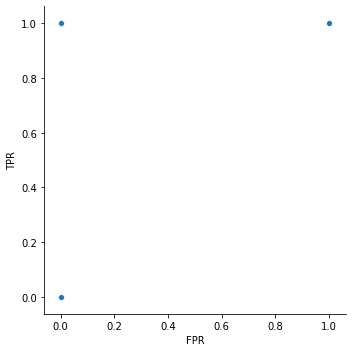

In [32]:
import seaborn as sns
sns.relplot(data = ROC_df,x='FPR',y='TPR')

In [33]:
from sklearn import metrics
auc_train = metrics.auc(ROC_df['FPR'],ROC_df['TPR'])
print(auc_train)

1.0


As can be seen, this corresponds to a perfect 'classifier'
Again this ROC and AUC has been done on train
There is a good possibility of these results being heavily skewed for test due to the 'incorrect' beta's obtained via
complete linear seperation

We'll estimate the test error via 5-fold CV on this training set

In [41]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=True)
fold_error = np.zeros(5)
count = 0
for train_index, test_index in kf.split(X_train,y_train):
    count = count + 1
    X_train_cv, X_test_cv = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train_cv_stats = sm.add_constant(X_train_cv)
    log_reg_cv = sm.Logit(y_train_cv,X_train_cv_stats).fit(maxiter=15)
    
    X_test_cv_stats = sm.add_constant(X_test_cv)
    
    y_test_cv_predicted_probab = log_reg_cv.predict(X_test_cv_stats) 
    
    y_test_cv_predicted = (y_test_cv_predicted_probab >= 0.5).astype(int)
    
    mis = 0
    for i in np.arange(0,y_test_cv.shape[0]):
        if y_test_cv_predicted[i] != y_test_cv.iloc[i]:
            mis = mis + 1
        
    error_estimate = (mis/(y_test_cv.shape[0]))*100
    fold_error[count-1] = error_estimate

print(fold_error)

         Current function value: 0.000000
         Iterations: 15
         Current function value: 0.000000
         Iterations: 15
         Current function value: 0.000000
         Iterations: 15
         Current function value: 0.000000
         Iterations: 15
         Current function value: 0.000000
         Iterations: 15
[ 7.14285714  0.          0.         14.28571429  0.        ]


C:\Users\DHRUV\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DHRUV\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DHRUV\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DHRUV\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\DHRUV\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

A few Comments :
Here I found that unlike the other parts of this HW, for the current part, the estimated errors were pretty large unless StratifiedKfold was used, and thus here CV was done via Stratified K fold, again applying stratified K fold is rather easy and doesn't need a lot of changes

Additionally in previous part Kfold was done manually by me, after shuffling the data set. The shuffle and the manual implementation as opposed to implementation via scikit may have been responsible for reducing the impact of class imbalance

Shuffling in itself helps to a large extent.

Kfold without shuffling < Kfold with shuffling < Stratified (with/without shuffling)
Is the order with which test errors can be better estimated, especially when the data has minor to major class imbalance

In [43]:
test_error_estimate = np.mean(fold_error)
print('The test error estimated here via 5-fold CV is : \n',test_error_estimate,'%')

The test error estimated here via 5-fold CV is : 
 4.285714285714286 %
